In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


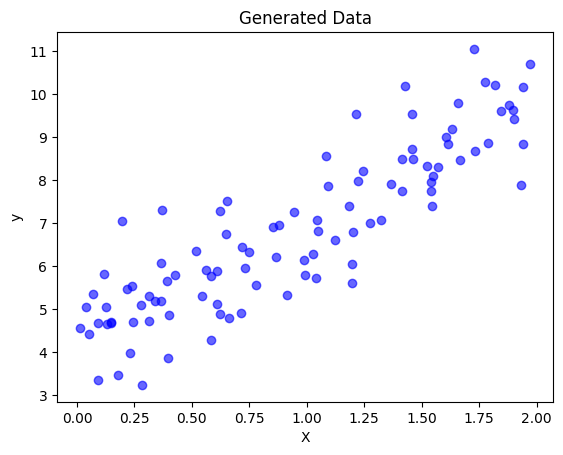

In [ ]:
# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)   # 100 points between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

plt.scatter(X, y, color="blue", alpha=0.6)
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)


Intercept: [4.14291332]
Coefficient: [[2.79932366]]


In [ ]:
# Predictions
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.6536995137170021
R^2 Score: 0.8072059636181392


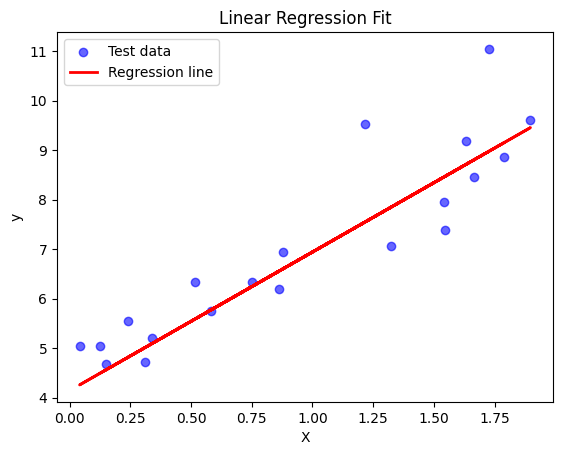

In [ ]:
# Visualization of regression line
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Test data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


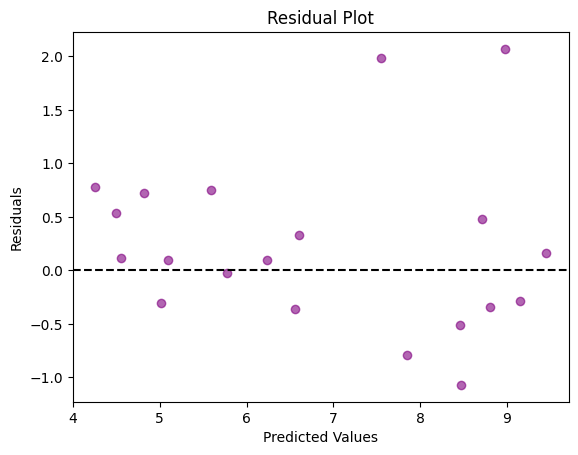

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color="purple", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


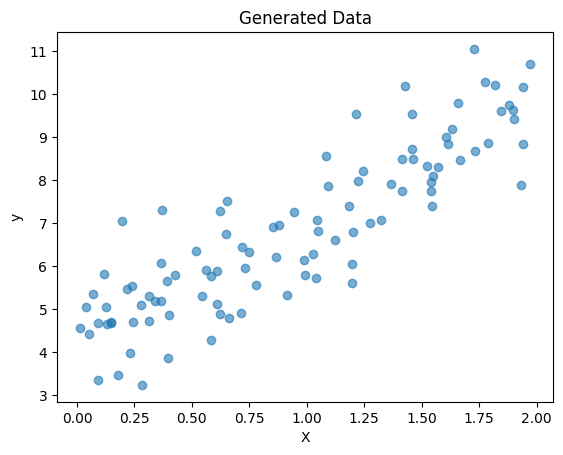

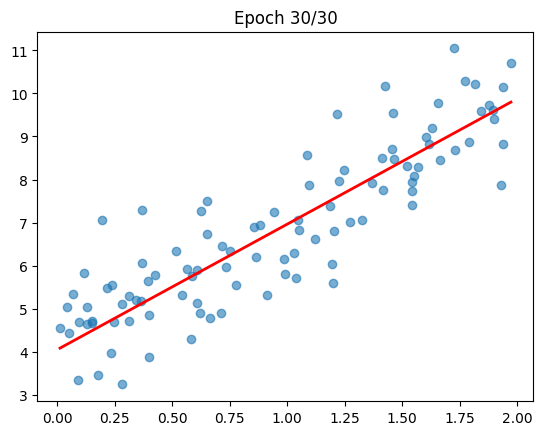

In [2]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.linear_model import SGDRegressor

# Cell 2: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y, alpha=0.6)
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Cell 3: SGD setup
sgd = SGDRegressor(
    loss="squared_error",
    penalty=None,
    alpha=0.0,
    learning_rate="invscaling",
    eta0=0.1,
    power_t=0.5,
    max_iter=1,
    tol=None,
    random_state=42,
    warm_start=True
)

# epochs = 30
# coef_hist, intercept_hist = [], []

# for epoch in range(epochs):
#     sgd.partial_fit(X, y.ravel())
#     coef_hist.append(sgd.coef_[0])
#     intercept_hist.append(sgd.intercept_[0])

epochs = 30
batch_size = 32  # try 16, 32, 64... smaller = noisier, larger = smoother
n = len(X)

coef_hist, intercept_hist = [], []

for epoch in range(epochs):
    # shuffle indices at the start of each epoch
    indices = np.random.permutation(n)

    # go through the data in batches
    for start in range(0, n, batch_size):
        batch_idx = indices[start:start + batch_size]
        X_batch = X[batch_idx]
        y_batch = y[batch_idx].ravel()

        sgd.partial_fit(X_batch, y_batch)

    # record slope and intercept once per epoch (after all batches)
    coef_hist.append(sgd.coef_[0])
    intercept_hist.append(sgd.intercept_[0])

# Cell 4: Animate regression line evolution
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.6)
line, = ax.plot([], [], color="red", linewidth=2)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    slope = coef_hist[frame]
    intercept = intercept_hist[frame]
    y_line = slope * x_line + intercept
    line.set_data(x_line, y_line)
    ax.set_title(f"Epoch {frame+1}/{epochs}")
    return line,

ani = FuncAnimation(fig, update, frames=epochs, init_func=init, blit=True, interval=300)

# Display animation in notebook
HTML(ani.to_jshtml())
